In [ ]:
# Importo librerias necesarias
import requests
from bs4 import BeautifulSoup

# URL de la sección "productos" de Peisa
url = "https://peisa.com.ar/productos"
# Request a la URL para obtener el código HTML
response = requests.get(url)
# Obtengo objeto de BeautifulSoup para poder encontrar los elementos solicitados
soup = BeautifulSoup(response.text, 'html.parser')

# Obtengo el bloque de categorias de productos
categories = soup.find_all('div', 'grid grid-cols-1 md:grid-cols-2 lg:grid-cols-4 gap-y-8 gap-x-12')
# Creo lista llamada "results" para guardar los elementos solicitados
results = list()
# Itero en cada una de las categorias
for category in categories:
   # Obtengo los links disponibles en cada categoria e itero sobre ellos asegurándome que los mismos correspondan a un producto del catálogo 
   for category_link in category.find_all('a'):
        if category_link['href'].startswith('https://peisa.com.ar/productos/'):
            # Guardo el link dle producto en una variable
            product_url = category_link['href']
            # Request a la URL del producto
            product_response = requests.get(product_url)
            # Obtengo objeto  BeautifulSoup
            product_soup = BeautifulSoup(product_response.text, 'html.parser')
            # Obtengo el nombre del producto
            name = product_soup.find('h2').text.strip()
            # Obtengo la descripción breve del producto
            brief = product_soup.find('h3').text.strip()
            # Obtengo la descripción detalalda del producto
            description = product_soup.find(name='div', class_='product-description').text.strip()
            # Obtengo los links disponibles en la URL del producto
            product_links = product_soup.find_all(name='a', class_='inline-flex items-center text-gray-700 hover:text-peisared-600')
            # Me quedo con los links que hacen referencia a manuales
            manual_links = [product_link['href'] for product_link in product_links if product_link['href'].startswith("https://peisa.nyc3.digitaloceanspaces.com/manuales")]
            # Agrego los elementos solicitados en forma de diccionario a la lista "results" 
            results.append({'name': name,
                            'brief': brief,
                            'description': description,
                            'manual': manual_links if manual_links else None})
        
        # Los productos de la categoria "Sistema de Caños y fittings" requieren otro tratamiento
        elif category_link['href'].startswith('https://ofitt.peisa.com.ar'):
            # Creo un bucle que permite navegar en todas las páginas de la sección productos
            i=1
            while True:
                page_url = f'https://ofitt.peisa.com.ar/productos/page/{i}/'
                # Request a la URL para obtener el código HTML de cada página
                page_response = requests.get(page_url)
                # En caso que la URL no exista el bucle se detiene ya que indica que se llegó a la última página
                if page_response.status_code!=200:
                    break
                # Obtengo objeto de BeautifulSoup
                page_soup = BeautifulSoup(page_response.text, 'html.parser')
                # Obtengo el listado de productos
                products = page_soup.find('ul', class_='products columns-3').find_all('li')
                # Itero sobre cada producto
                for prod in products:
                    # Guardo su el nombre del producto
                    name = prod.find('h2', class_='woocommerce-loop-product__title').text.strip()
                    # Lo agrego a la lista 
                    results.append({'name': name,
                                    'brief': 'Sistema de Caños y fittings',
                                    'description': None,
                                    'manual': None})
                # Incremento el iterador
                i+=1

# Imprimo el resultado del scrapping
print(results)

# Desafío de Ciencia de Datos

de Global Commerce

## I. Extracción de información desde un portal
A continuación se tiene que extraer información desde un portal web. En este caso, se tiene el siguiente sitio URL: "https://peisa.com.ar/productos"

Dentro de este sitio, se quiere obtener la información de los productos "Accesorios para la Instalación".

1. Implementar un "scrapper" que obtenga automáticamente los productos de esta categoría. Para cada uno de estos "productos", se debe obtener el nombre, una descripción corta, una descripción más larga y el link a el manual pdf si existiera. Por ejemplo, el sistema debiera entregar el siguiente diccionario python:

```
{'name': 'Vasos de expansión para Sistemas de Calefacción',
  'brief': 'Apto para sistemas de calefacción',
  'description': 'Los vasos de expansión para sistemas de calefacción permiten absorber las variaciones de volumen de agua en un sistema de calefacción cerrado.\n\n\nVentajas:\n\n\n\n\nEs un elemento de seguridad.\n\n\nLarga duración.\n\n\nSoporta hasta 100°C.',
  'manual': 'https://peisa.nyc3.digitaloceanspaces.com/manuales/Manual_vasos%20expansion.pdf'}
  ```

Cabe mencionar que para obtener esta información más detallada, hay que extraerlos de páginas como:

https://peisa.com.ar/productos/vasos-de-expansion-para-sistemas-de-calefaccion

Generar una lista de estos diccionarios.


In [387]:
## ------------- Global Commerce: Desarrollado por Valentin Tafura -------------


# Importo librerias necesarias
import requests
from bs4 import BeautifulSoup


# ------------- Sección 1: Request a la URL de Peisa y obtención del objeto BeautifulSoup -------------


# URL de la sección "productos" de Peisa
url = "https://peisa.com.ar/productos"
# Request a la URL para obtener el código HTML
response = requests.get(url)
# Obtengo objeto de BeautifulSoup para poder encontrar los elementos solicitados
soup = BeautifulSoup(response.text, 'html.parser')


# ------------- Sección 2: Obtengo el bloque HTML que hace referencia a la categoria 'Accesorios para la Instalación' -------------

# Encuentro los elementos que hacen referencia a los titulos de las categorias
category_titles = soup.find_all('div', 'container mt-32')
# Me quedo con los titulos de las categorias
titles = [title.text.strip() for title in category_titles]
# Encuentro el indice de la categoria 'Accesorios para la Instalación' dentro de la lista 'titles' 
index = titles.index('Accesorios para la Instalación')
# Obtengo los elementos que hacen referencia a las categorias
categories = soup.find_all('div', 'grid grid-cols-1 md:grid-cols-2 lg:grid-cols-4 gap-y-8 gap-x-12')
# Me quedo con la categoria 'Accesorios para la Instalación'
my_category = categories[index]

# ------------- Sección 3: Itero sobre cada producto para obtener los campos solicitados -------------

# Creo lista llamada "results" para guardar los elementos solicitados
results=[]

# Itero sobre cada link dentro de 'my_category' y me quedo solo con los que correspondan a un producto del catálogo 
for link in my_category.find_all('a'):
    if link['href'].startswith('https://peisa.com.ar/productos/'):
        
        # Guardo el link dle producto en una variable
        product_url = link['href']
        # Request a la URL del producto
        product_response = requests.get(product_url)
        # Obtengo objeto BeautifulSoup
        product_soup = BeautifulSoup(product_response.text, 'html.parser')
        
        # Obtengo el nombre del producto
        name = product_soup.find('h2').text.strip()
        # Obtengo la descripción breve del producto
        brief = product_soup.find('h3').text.strip()
        # Obtengo la descripción detalalda del producto
        description = product_soup.find(name='div', class_='product-description').text.strip()
        
        # Obtengo los links disponibles en la URL del producto
        product_links = product_soup.find_all(name='a', class_='inline-flex items-center text-gray-700 hover:text-peisared-600')
        # Me quedo con los links que hacen referencia a manuales (que pueden ser 1 o mas)
        manual_links = [product_link['href'] for product_link in product_links if product_link['href'].startswith("https://peisa.nyc3.digitaloceanspaces.com/manuales")]
        
        # Agrego los elementos solicitados en forma de diccionario a la lista "results" 
        results.append({'name': name,
                        'brief': brief,
                        'description': description,
                        'manual': manual_links if manual_links else None
                        })

In [396]:
# Muestro los primeros 2  registros
results[:2]

[{'name': 'Vasos de expansión para Sistemas de Calefacción',
  'brief': 'Apto para sistemas de calefacción',
  'description': 'Los vasos de expansión para sistemas de calefacción permiten absorber las variaciones de volumen de agua en un sistema de calefacción cerrado.\nVentajas:\n\nEs un elemento de seguridad.\nLarga duración.\nSoporta hasta 100°C.',
  'manual': ['https://peisa.nyc3.digitaloceanspaces.com/manuales/Manual_vasos%20expansion.pdf']},
 {'name': 'Vasos de expansión Agua Sanitaria',
  'brief': 'Aptos para agua potable',
  'description': 'Los vasos de expansión para agua sanitaria permiten absorber las variaciones de volumen de agua en función de los aumentos de temperatura de la instalación. Su diseño inhibe el crecimiento bacteriano y habilita el uso de agua potable.\r\nLos vasos anti golpe de ariete son un tipo de vaso de expansión para agua sanitaria que tiene una mayor resistencia a los aumentos de presión.\nVentajas:\n\nEs un elemento de seguridad.\nLarga duración.\nNo 

2. Transformar esta información a una tabla Pandas y Grabar un archivo csv

Entregar un código ordenado, de manera que sea fácilmente entendible, se aconseja acompañar de comentarios generales descriptivo de diferentes bloques de código (se puede hacer como línea de comentario python, al comenzar esa línea con #).

Se sugiere entregarlo en un notebook Jupyter.

In [398]:
import pandas as pd

# Guardo resultado en una DataFrame de Pandas
results_df = pd.DataFrame(results)
# Exporto table a CSV
results_df.to_csv('catalogo_peisa.csv', index=False, encoding='utf-8')

## II. Análisis de Información y Modelamiento


1. Cargar la información del archivo `Registros-de-ventas-1000.csv` en un dataframe de Pandas.

In [125]:
import pandas as pd

data = pd.read_csv('Registros-de-ventas-1000.csv')
data.head()

,ID Cliente,Zona,País,Tipo de producto,Canal de venta,Prioridad,Fecha pedido,ID Pedido,Fecha envío,Unidades,Precio Unitario,Coste unitario,Importe venta total,Importe Coste total
0,C2421,Europa,United Kingdom,Snacks,Offline,Crítica,2020-10-12,242113196,2020-11-30,5530,152.58,97.44,843767.40,538843.20
1,C1908,Europa,Malta,Cárnicos,Online,Alta,2020-01-26,190800607,2020-01-28,994,421.89,364.69,419358.66,362501.86
2,C7652,Australia y Oceanía,Marshall Islands,Cereales,Online,Crítica,2020-11-09,765228068,2020-11-21,6845,205.70,117.11,1408016.50,801617.95
3,C2326,África,Iran,Frutas,Offline,Baja,2021-08-21,232631909,2021-10-02,9806,9.33,6.92,91489.98,67857.52
4,C5305,Centroamérica y Caribe,Guatemala,Alimento infantil,Offline,Media,2022-09-30,530560958,2022-11-12,3633,255.28,159.42,927432.24,579172.86


2. A partir de la información cargadas, generar un diccionario donde las llaves son las "Zonas" y el valor es el istado de todos los países que pertenecen a cada "Zona".

In [126]:
data.groupby(by='Zona')['País'].apply(list).to_dict()

{'Asia': ['Uzbekistan',
  'Sri Lanka',
  'Myanmar',
  'Bhutan',
  'North Korea',
  'Indonesia',
  'Singapore',
  'South Korea',
  'Myanmar',
  'Vietnam',
  'Bangladesh',
  'China',
  'Kazakhstan',
  'China',
  'Thailand',
  'Taiwan',
  'India',
  'South Korea',
  'Maldives',
  'North Korea',
  'Uzbekistan',
  'Singapore',
  'Thailand',
  'Japan',
  'Turkmenistan',
  'India',
  'Uzbekistan',
  'Mongolia',
  'Vietnam',
  'Thailand',
  'China',
  'Bangladesh',
  'China',
  'Mongolia',
  'South Korea',
  'Myanmar',
  'Japan',
  'Laos',
  'Philippines',
  'Bhutan',
  'Sri Lanka',
  'Brunei',
  'Malaysia',
  'Nepal',
  'Tajikistan',
  'Japan',
  'Tajikistan',
  'Turkmenistan',
  'Uzbekistan',
  'Singapore',
  'Bhutan',
  'Myanmar',
  'China',
  'Laos',
  'Kazakhstan',
  'Laos',
  'Philippines',
  'North Korea',
  'Bhutan',
  'South Korea',
  'Vietnam',
  'Maldives',
  'Taiwan',
  'Bangladesh',
  'Japan',
  'Malaysia',
  'Tajikistan',
  'Malaysia',
  'Turkmenistan',
  'Japan',
  'Japan',
  'C


3. Crear una nueva columna que se llame "dias" y sea la diferencia en días entre la fecha de `pedido` y la de `envio`. Generar un gráfico de densidad (histograma) de distribución de esta variable.

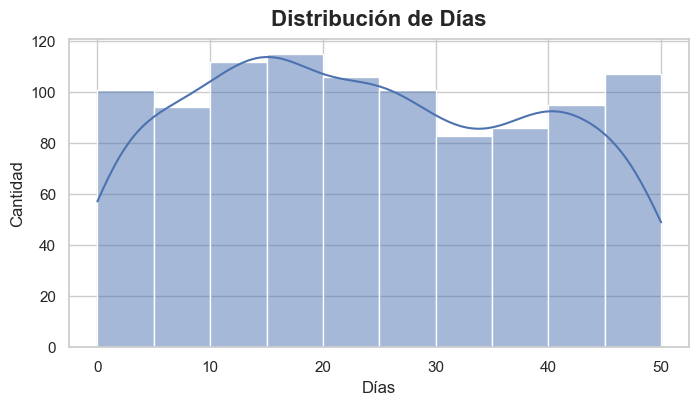

In [127]:
# Paso columnas de fecha a formato datetime
data['Fecha envío'] = pd.to_datetime(data['Fecha envío'])
data['Fecha pedido'] = pd.to_datetime(data['Fecha pedido'])
# Calculo dias transcurridos entre el envío y el pedido
data['Dias'] = (data['Fecha envío'] - data['Fecha pedido']).dt.days

# Gráfico del histograma
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciono el tema
sns.set_theme(style="whitegrid")
# Establezco el tamaño del gráfico
plt.figure(figsize=(8,4))
# Plot del histograma con 10 bins
sns.histplot(data['Dias'], kde=True, bins=10)
# Titulo y labels 
plt.title('Distribución de Días', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Días', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

plt.show()

4. Generar un modelo usando scikit-learn donde se prediga esta última variable de "dias hasta entrega" al agregar cualquiera o todas las otras variables (excluyendo las columnas "ID Cliente","Fecha pedido","ID Pedido","Fecha envío","Importe venta total","Importe Coste total")

In [128]:
# -------- FEATURE ENGINEERING --------

# Calculo del margen unitario por pedido
data['Margen Unitario'] = (data['Precio Unitario'] - data['Coste unitario'])/data['Precio Unitario']

# Obtengo el dia de la semana, la semana y el mes de la fecha del pedido
data['Mes Pedido'] = data['Fecha pedido'].dt.month_name()
data['Dia Semana Pedido'] = data['Fecha pedido'].dt.day_name()
data['Semana Pedido'] = data['Fecha pedido'].dt.quarter.astype(str)

In [129]:
# Elimino columnas indicadas
data.drop(["ID Cliente", "Fecha pedido", "ID Pedido",\
           "Fecha envío","Importe venta total","Importe Coste total"],
             axis=1,
             inplace=True)

In [130]:
# Verifico que no hayan nulos y que las columnas tengan los tipos de datos correspondientes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zona               1000 non-null   object 
 1   País               1000 non-null   object 
 2   Tipo de producto   1000 non-null   object 
 3   Canal de venta     1000 non-null   object 
 4   Prioridad          1000 non-null   object 
 5   Unidades           1000 non-null   int64  
 6   Precio Unitario    1000 non-null   float64
 7   Coste unitario     1000 non-null   float64
 8   Dias               1000 non-null   int64  
 9   Margen Unitario    1000 non-null   float64
 10  Mes Pedido         1000 non-null   object 
 11  Dia Semana Pedido  1000 non-null   object 
 12  Semana Pedido      1000 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 101.7+ KB


In [131]:
data.describe().round(2)

,Unidades,Precio Unitario,Coste unitario,Dias,Margen Unitario
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,5024.48,260.84,184.08,24.04,0.34
std,2818.86,216.12,175.04,14.56,0.13
min,1.00,9.33,6.92,0.00,0.14
25%,2666.50,81.73,35.84,12.00,0.26
50%,5125.50,154.06,97.44,23.00,0.33
75%,7473.75,421.89,263.33,37.00,0.41
max,9989.00,668.27,524.96,50.00,0.67


In [132]:
# Plot de valores únicos de las columnas categóricas

print(f"{'Column':21}| {'Values'}")
print("-------"*12)

for col in data.select_dtypes('object'):
    unique_values = data[col].dropna().unique()
    n_unique = len(unique_values)
    unique_values_dim = unique_values if n_unique<5 else unique_values[:5]
    unique_values_str = ", ".join(unique_values_dim) if n_unique<5 else (", ".join(unique_values_dim) + ', ..., other ' +f'{n_unique-5}'+' values')
 
    print(f"{col:21}| {unique_values_str}")

Column               | Values
------------------------------------------------------------------------------------
Zona                 | Europa, Australia y Oceanía, África, Centroamérica y Caribe, Norteamérica, ..., other 1 values
País                 | United Kingdom, Malta, Marshall Islands, Iran, Guatemala, ..., other 179 values
Tipo de producto     | Snacks, Cárnicos, Cereales, Frutas, Alimento infantil, ..., other 7 values
Canal de venta       | Offline, Online
Prioridad            | Crítica, Alta, Baja, Media
Mes Pedido           | October, January, November, August, September, ..., other 7 values
Dia Semana Pedido    | Monday, Sunday, Saturday, Friday, Thursday, ..., other 2 values
Semana Pedido        | 4, 1, 3, 2


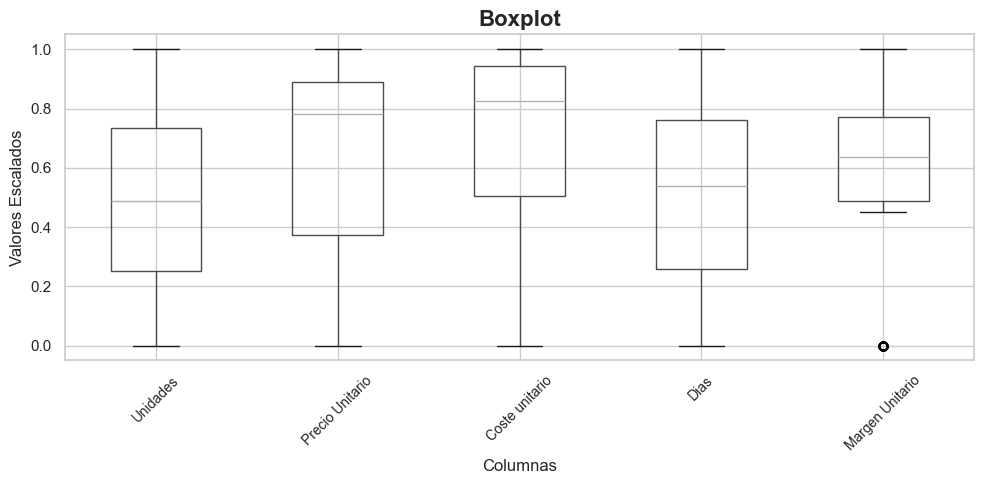

In [133]:
# ------- OUTLIERS --------

# Plot the  columnas numéricas para detectar outliers
# Para visualizarlas todas juntas se escalan los valores entre 0 y 1

import numpy as np
numeric_columns = data.select_dtypes('number').columns

# Tamaño del gráfico
plt.figure(figsize=(10, 5))

# Calculo de minimos y máximos
min = data[numeric_columns].max()
max = data[numeric_columns].min()

# Boxplot 
((data[numeric_columns] - min) / (max-min)).boxplot()

# Titulo y labels
plt.title('Boxplot', fontsize=16, fontweight='bold')
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Valores Escalados', fontsize=12)

# Roto los labels del eje X
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

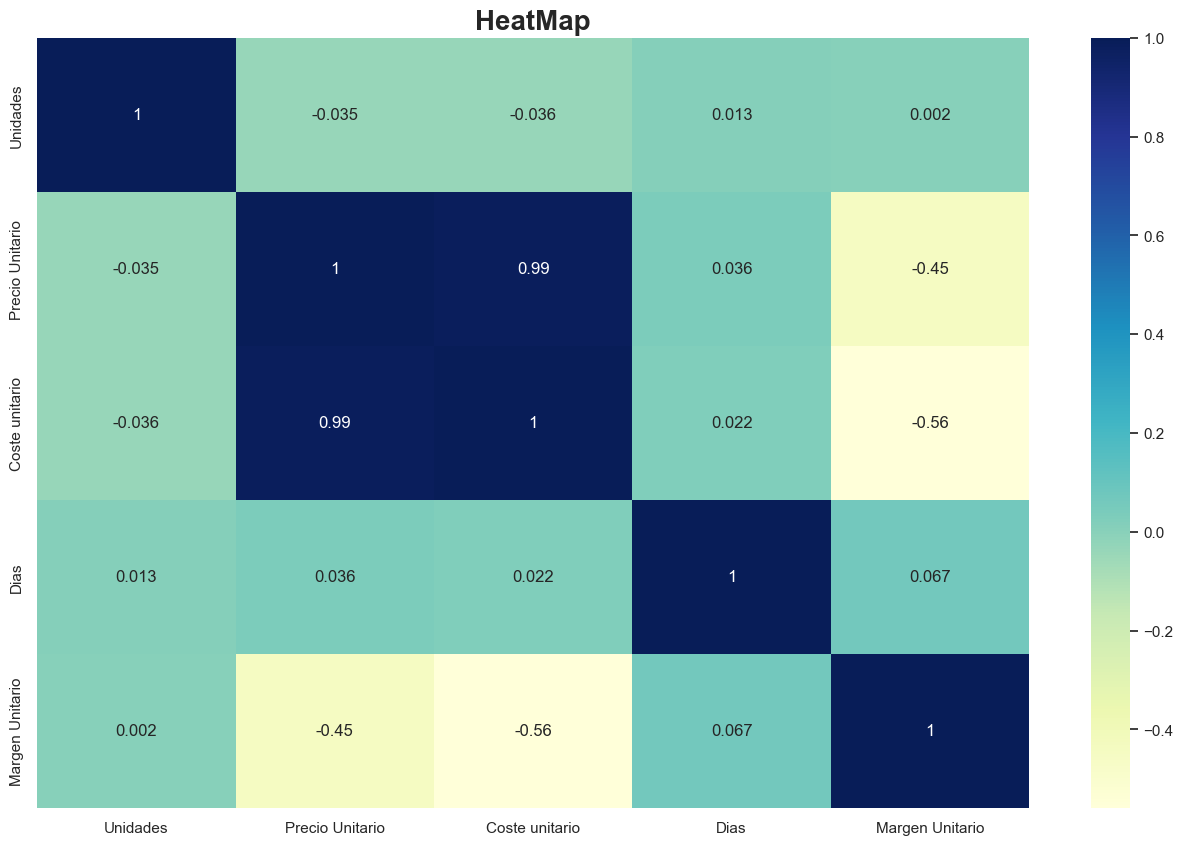

In [134]:
# ----- SELECCION DE VARIABLES -----

# Plot del mapa de correlaciones de variables numéricas 

plt.figure(figsize = (16, 10))

sns.heatmap(data[numeric_columns].corr(), annot = True, cmap="YlGnBu")
plt.title('HeatMap', fontsize=20, fontweight="bold")
plt.show()

In [135]:
# Elimino la columna Precio Unitario ya que tiene una correlación del 99% con 
# la columna Coste Unitario indicando que se mueven casi perfectamente en la misma dirección
data.drop('Precio Unitario', axis=1, inplace=True)

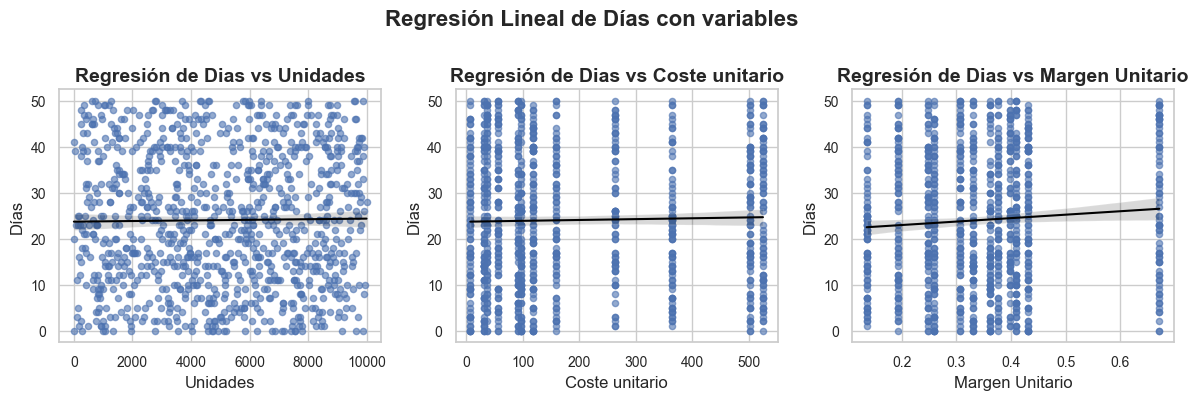

In [136]:
# ----- RELACION DE LA VARIABLE DIAS CON X --------

# Estimacion de una recta de regresión entre Y con cada feature

# Tema
sns.set_theme(style="whitegrid")
# Tamaño del gráfico
fig = plt.figure(figsize=(12, 10))

# Armo subplots
for i, col in enumerate(data.select_dtypes('number').columns.drop('Dias')):
    if col != 'price':
        plt.subplot(3, 3, i + 1)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        
        # Creación del regplot
        sns.regplot(
            x=data[col], 
            y=data['Dias'], 
            scatter_kws={'s': 20, 'alpha': 0.6}, 
            line_kws={"color": "black", "linewidth": 1.5}
        )
        
        # 
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Días', fontsize=12)
        plt.title(f'Regresión de Dias vs {col}', fontsize=14, fontweight='bold')

        
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top margin
plt.suptitle('Regresión Lineal de Días con variables', fontsize=16, fontweight='bold')
plt.show()

El gráfico indoca que la relación entre las Unidades y el Costo del pedido no tienen una relación lineal con los dias de despacho del pedido, y tiene una leve tendencia positiva con el margen

In [137]:
# ------ TRATAMIENTO DE VARIABLES CATEGORICAS ------

# Calculo la mediana de Dias para cada categoria de las columnas categóricas 
# y lo mapeo al dataframe

obj_columns = data.select_dtypes('object').columns

for col in obj_columns:

    data[col+'_agrup'] = data[col].map(data.groupby(by=col)['Dias'].median())

data['agrup'] = data.set_index(['Zona', 'Canal de venta', 'Prioridad']).index.map(data.groupby(by=['Zona', 'Canal de venta', 'Prioridad'])['Dias'].median())

In [138]:
# Elimino columnas categóricas que ahora estan representadas con la mediana de dias correspondiente
data.drop(data.select_dtypes('object').columns, axis=1, inplace=True)

In [139]:
# Observo el df con las columnas incorporadas
data.head()

,Unidades,Coste unitario,Dias,Margen Unitario,Zona_agrup,País_agrup,Tipo de producto_agrup,Canal de venta_agrup,Prioridad_agrup,Mes Pedido_agrup,Dia Semana Pedido_agrup,Semana Pedido_agrup,agrup
0,5530,97.44,49,0.361384,23.0,28.0,17.0,23.0,25.0,23.0,27.0,25.0,30.0
1,994,364.69,2,0.135580,23.0,21.0,21.5,23.0,22.0,25.0,20.5,23.0,17.0
2,6845,117.11,12,0.430676,23.0,16.0,27.0,23.0,25.0,24.5,27.0,25.0,18.5
3,9806,6.92,42,0.258307,24.0,19.0,22.5,23.0,22.0,19.0,25.0,22.0,25.0
4,3633,159.42,43,0.375509,26.0,23.0,24.0,23.0,22.0,23.5,23.0,22.0,28.0


La variable a predecir sera una variable categorica que tomara el valor:

    - 'bajo': Cuando los dias entre el pedido y el envio es menor a 15 dias
    - 'medio': Cuando es mayor a 15 dias y menor a 31 dias
    - 'alto': Cuando es mayor a 31 dias

Text(0.5, 1.0, 'Distribución de Tiempos de Envío')

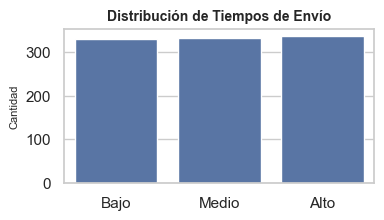

In [141]:
# ------ Obtencion de la columna label y los features -----

# Discretizacion de y en bins
bins = ([0, 15, 31, 50])
# 
labels = {0: 'Bajo', # y < 15 dias
          1: 'Medio', # 15 dias < y < 31 dias
          2: 'Alto'   # y > 31 dias
          }

# Obtengo y
y = pd.cut(data['Dias'], bins=bins, labels=labels.keys(), include_lowest=True)

# Obtengo X
X = data.drop('Dias', axis=1)

# Tema
sns.set_theme(style="whitegrid")

# Tamaño del gráfico
fig = plt.figure(figsize=(4, 2))

# Plot de la distribucion de lo bins de la columna y
sns.barplot(y.map(labels).value_counts())

# Etiquetas
plt.xlabel('')
plt.ylabel('Cantidad', fontsize=8)
plt.title('Distribución de Tiempos de Envío', fontsize=10, fontweight='bold')

In [142]:
# ------ Train-Test split y escalamiento de Features -----

# Separo datos de train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalo datos entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns=X_train.columns,
                              index=X_train.index)


X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                              columns=X_test.columns,
                              index=X_test.index)

### Entrenamiento

El entrenamiento se realizara mediante la funcion 'trainer' que tomara un grid de hiperparametros y se validara con cross-validation (10 folds). La metrica de evaluacion sera el AUC 

In [146]:
# ----- Entrenamiento del modelo -------

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

def trainer(sk_models, param_grids):
    
    """ Devuelve el AUC del CV y de la base de testing junto al nombre del 
        modelo y la mejor combinacion de hiperparametros"""
    
    # Diccionario donde se guardaran los resultados
    results = {'RandomForestClassifier': [], 
               'GradientBoostingClassifier': [],
               'KNeighborsClassifier': [],
               'SVC': []
               }
    # Itero sobre los modelos
    for model in sk_models:
        # Guardo el nombre del modelo
        model_name = model.__class__.__name__
        # Hago el GridSearchCV para encontrar la mejor combinacion de hiperparemtros
        grid_search = GridSearchCV(model, param_grids[model_name], 
                                cv=10, 
                                scoring='roc_auc_ovr_weighted',
                                n_jobs=-1)

        grid_search.fit(X_train_scaled, y_train)

        # Obtendo las probabilidades asociadas a cada clase
        y_proba = grid_search.predict_proba(X_test_scaled)
        # AUC de test
        auc_test = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
        
        # Guardo resultados
        results[model_name] = {'best_params' : grid_search.best_params_,
                               'auc_train'   : round(grid_search.best_score_, 3),
                               'auc_test'    : round(auc_test, 3)
                               }
        
    return pd.DataFrame(results).T
    

In [147]:
# Modelos a entrenar
sk_models = [RandomForestClassifier(), 
             GradientBoostingClassifier(),
             KNeighborsClassifier(),
             SVC(probability=True)
             ]

# Hiperparametros para cada modelo
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [3000, 5000],
        'max_depth': [7, 10]
        },
    'GradientBoostingClassifier': {
        'n_estimators': [1000, 5000],
        'learning_rate': [0.01],
        'max_depth': [7, 15]
        },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 4, 5, 6, 7]
        },
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
        }
    }

# Entrenamiento
trainer_results = trainer(sk_models, param_grids)

In [148]:
# Imprimo resultados
trainer_results.style.background_gradient()

,best_params,auc_train,auc_test
RandomForestClassifier,"{'max_depth': 7, 'n_estimators': 3000}",0.640000,0.667000
GradientBoostingClassifier,"{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}",0.596000,0.619000
KNeighborsClassifier,{'n_neighbors': 6},0.531000,0.522000
SVC,"{'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}",0.641000,0.660000


In [149]:
# Elijo el mejor modelo (Random Forest)
best_model = RandomForestClassifier(**trainer_results['best_params']['RandomForestClassifier'])
best_model.fit(X_train_scaled, y_train)

# Obtengo las predicciones de test
y_pred = best_model.predict(X_test_scaled)

from sklearn.metrics import classification_report

# Imprimo el reporte
print(classification_report(y_true = y_test,
                            y_pred = y_pred
                            ))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52        69
           1       0.33      0.49      0.39        59
           2       0.56      0.44      0.50        72

    accuracy                           0.47       200
   macro avg       0.49      0.47      0.47       200
weighted avg       0.50      0.47      0.47       200



El modelo posee un poder predictivo medio-bajo donde no llega a separar bien las clases debido a que el AUC es bajo (menor al 70%).
A su vez el modelo predice el 50% de las clases correctamente e identifica el 47% de las clases verdaderas, promediando un f1-score dle 47%.